## Unlocking Job Insights in Data Science through Web Scraping across Nordic & German Markets 
🌐📊 #DataScienceJobs #MarketResearch

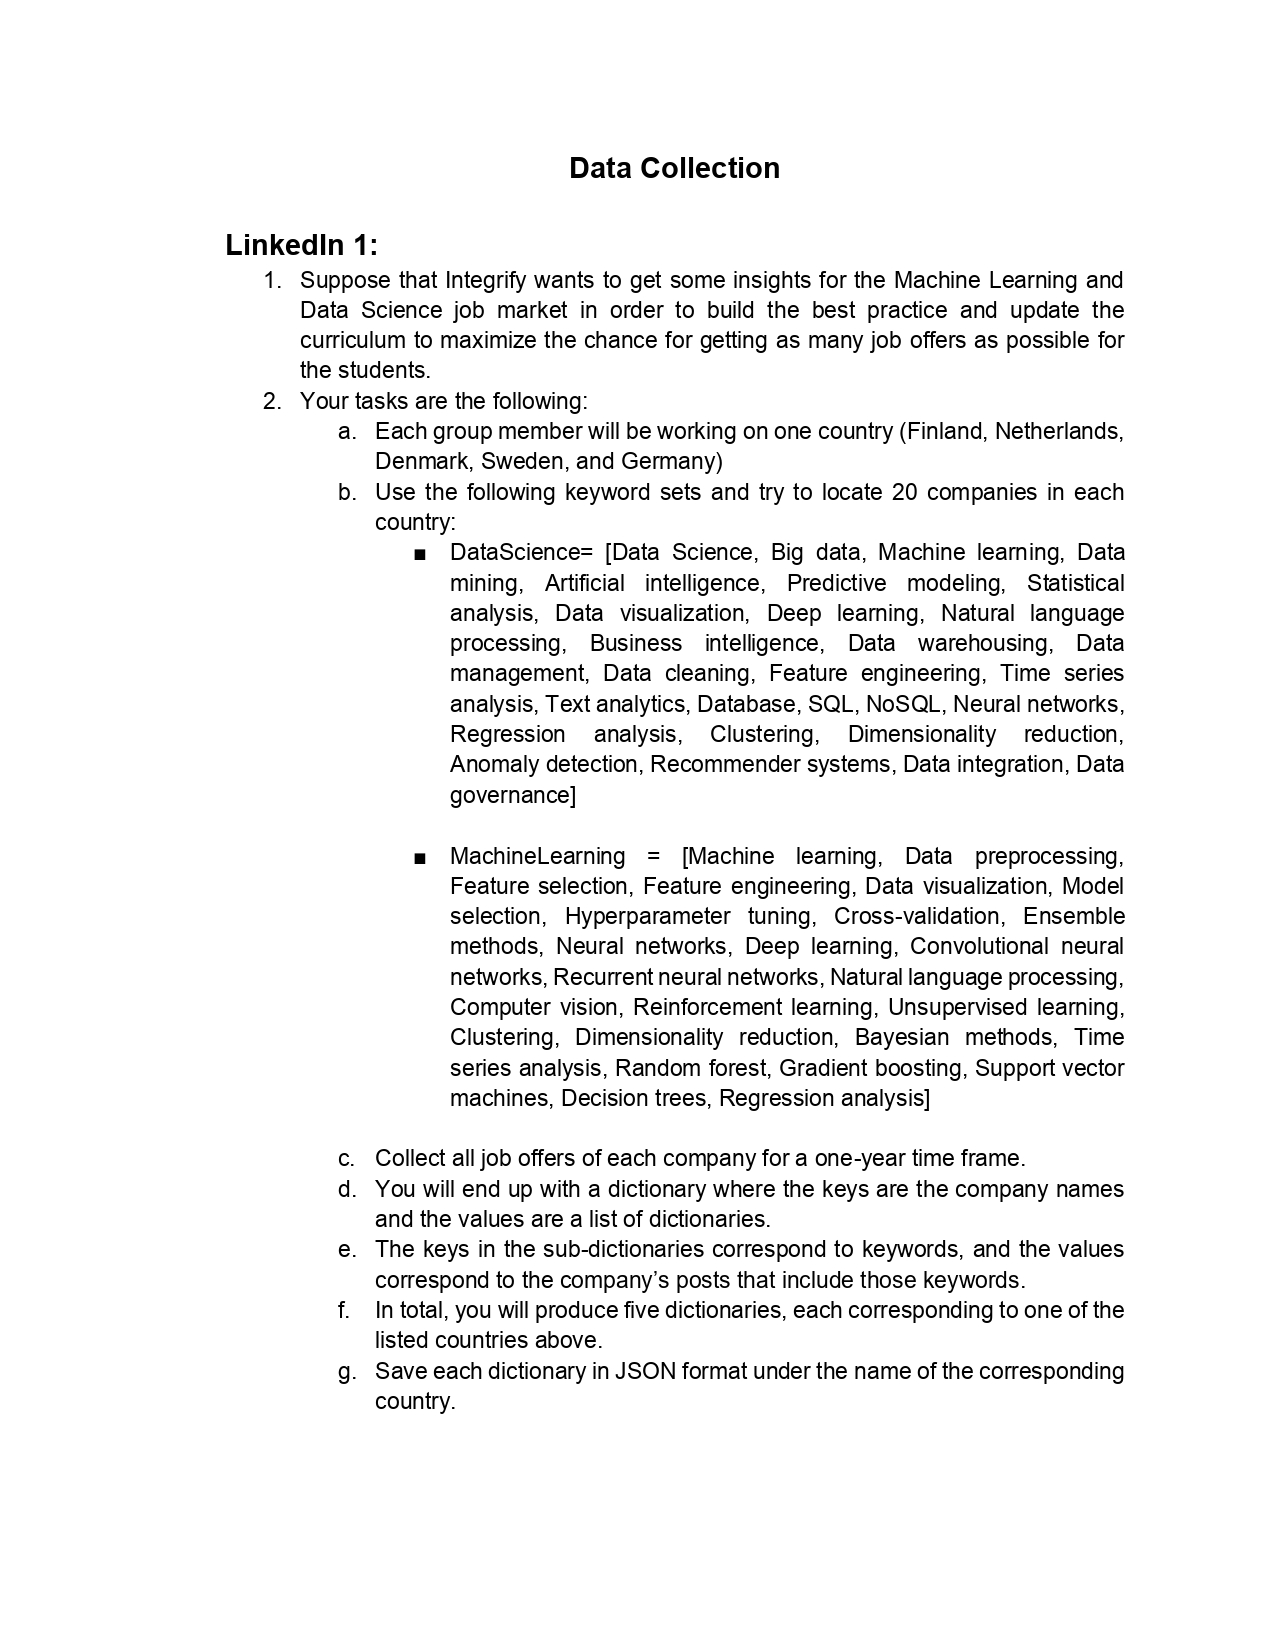

In [ ]:
import requests
from bs4 import BeautifulSoup
import json


class LinkedinScraper:
    
    # Define the two lists to concatenate
    DataScience = ['Data Science', 'Big data', 'Machine learning','ML', 'Data mining', 'Artificial intelligence', 'AI', 'Predictive modeling',
               'Statistical analysis', 'Data visualization', 'Deep learning', 'Natural language processing', 'Business intelligence',
               'Data warehousing', 'Data management', 'Data cleaning', 'Feature engineering', 'Time series analysis', 'Text analytics',
               'Database', 'SQL', 'NoSQL', 'Neural networks', 'Regression analysis', 'Clustering', 'Dimensionality reduction',
               'Anomaly detection', 'Recommender systems', 'Data integration', 'Data governance']
    
    MachineLearning = ['Machine learning', 'Data preprocessing', 'Feature selection', 'Feature engineering', 'Data visualization',
                   'Model selection', 'Hyperparameter tuning', 'Cross-validation', 'Ensemble methods', 'Neural networks', 'Deep learning',
                   'Convolutional neural networks', 'Recurrent neural networks', 'Natural language processing', 'Computer vision',
                   'Reinforcement learning', 'Unsupervised learning', 'Clustering', 'Dimensionality reduction', 'Bayesian methods',
                   'Time series analysis', 'Random forest', 'Gradient boosting', 'Support vector machines', 'Decision trees', 'Regression analysis']

    # Concatenate the two lists
    keywords = DataScience + MachineLearning
    
    def __init__(self, country_name, geoId, companies):
        self.country_name = country_name
        self.geoId = geoId
        self.companies = companies
        self.search_url_pattern = 'https://www.linkedin.com/jobs/search/?currentJobId={}&distance=25&geoId={}&keywords={}&refresh=true&start={}'

    
    
    def scrape_jobs(self, output_file_path):
        start_index = 0
        jobs_per_page = 25
        total_jobs_downloaded = 0        
        
        
        # Iterate over each company and search for matching jobs
        with open(output_file_path, 'w', encoding='utf-8') as json_file:
            for i, company in enumerate(self.companies):
                print(f"Company {i+1}: {company}")
                jobs_downloaded = 0
                # Iterate until no matching jobs are found
                while True:
                    # Construct the search URL
                    search_url = self.search_url_pattern.format(start_index, self.geoId, company, start_index)

                    # Send a GET request to the search URL
                    response = requests.get(search_url)

                    # Parse the HTML content of the page using BeautifulSoup
                    soup = BeautifulSoup(response.content, 'html.parser')

                    # Find all the job posting URLs on the page
                    job_urls = [a['href'] for a in soup.find_all('a', href=True) if '/jobs/view/' in a['href']]

                    # If no matching jobs are found, break the loop
                    if len(job_urls) == 0:
                        break

                    # Iterate over each job URL and extract the job information
                    for job_url in job_urls:               

                        # Send a GET request to the job URL

                        response = requests.get(job_url)

                        # Parse the HTML content of the page using BeautifulSoup
                        soup = BeautifulSoup(response.content, 'html.parser')

                        # Find the job title and company name
                        title = soup.find('h1', class_='topcard__title')
                        if title is not None:
                            title = title.text.strip()
                        else:
                            continue
                        company_name = soup.find('a', class_='topcard__org-name-link')
                        if company_name is not None:
                            company_name = company_name.text.strip()
                        else:
                            continue

                        # Find the div tag that contains the job description
                        description_div = soup.find('div', class_='description__text')

                        if description_div is not None:
                            # Extract the job description text
                            job_description = description_div.get_text().strip()
                            job_description = job_description.replace('Show more', '').replace('Show less', '')

                            # Remove any extra spaces from the job description
                            job_description = ' '.join(job_description.split())


                            found_keywords = [keyword for keyword in self.keywords if keyword in job_description]                      

                            if found_keywords:
                                job_info = {
                                    'Country_name': self.country_name,
                                    'company_name': company_name,
                                    'keywords': found_keywords,
                                    'description': job_description 
                                } 
                                
                                with open(output_file_path, 'a', encoding='utf-8') as json_file:
                                    json.dump(job_info, json_file, ensure_ascii=False)
                                    json_file.write('\n')
                                
                                jobs_downloaded += 1
                                total_jobs_downloaded += 1                       
                        
                    
                                print(f"         Job {jobs_downloaded}: {title} downloaded!") 
                            
                
                if jobs_downloaded == 0:
                    print(f"         No jobs found for {company}")  
                            
                        
        print()
        print("Total {} jobs downloaded!".format(total_jobs_downloaded ))                                  


###  Scraping Machine learning and Data science job data for Finland

In [ ]:
country_name= "Finland"
geoId="100456013"
companies=['Wolt', 'Nigel Frank International', 'Tietoevry', 'Silo AI', 'Solita', 'CGI', 'Wärtsilä', 'F-Secure', 'Neste', 'Huawei', 'Aiven', 'Unikie', 'Smartly.io', 'Nokia', 'Vaisala', 'Futurice', 'Valohai', 'ABB', 'VTT']

print("Country: ", country_name)
print()

scraper = LinkedinScraper(country_name, geoId, companies )
scraper.scrape_jobs("DS_jobs_finland.json")

Country:  Finland

Company 1: Wolt
         Job 1: Pricing Strategy Analyst downloaded!
         Job 2: AI Engineer - DevOps/MLOps downloaded!
         Job 3: Product Lead, Consumer Pricing downloaded!
         Job 4: Process Owner - Record to Report downloaded!
         Job 5: Data Science - Machine Learning Engineer downloaded!
         Job 6: Global Paid Search Manager downloaded!
         Job 7: AP Process Owner downloaded!
         Job 8: HRIS Development Manager downloaded!
         Job 9: Senior Manager Benefits downloaded!
         Job 10: Finance System Development Manager downloaded!
         Job 11: Engineering Team Lead, Logistics Allocation downloaded!
         Job 12: Senior Python Backend Engineer downloaded!
         Job 13: Engineering Team Lead, Data Governance Engineering downloaded!
         Job 14: Senior Backend (Python) Engineer, Payment Integrations downloaded!
         Job 15: Senior Frontend Engineer, Merchant Group downloaded!
         Job 16: Senior Python B

### A JSON file containing scraped data for Finland might look like this:

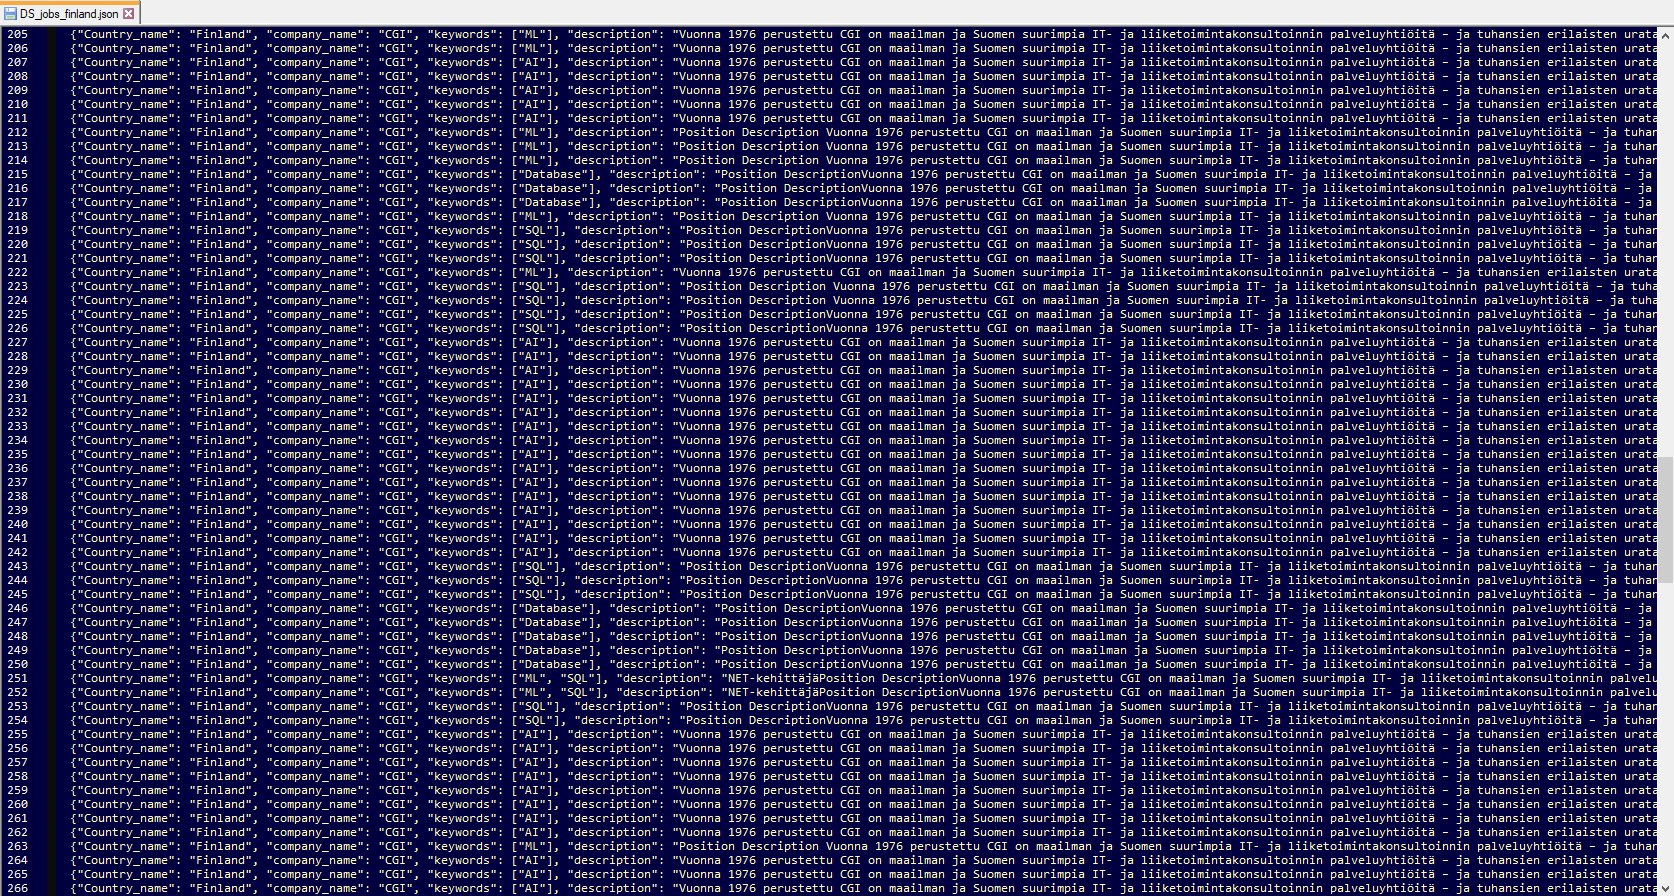

###  Scraping Machine learning and Data science job data for Netherlands

In [ ]:
country_name= "Netherlands"
geoId="102890719"
companies =['Booking.com', 'ASML',  'NXP Semiconductors',  'Coolblue', 'Exact','Deloitte', 'Capgemini', 'IBM', 'Amazon', 'Google', 'Microsoft', 'Uber', 'Xccelerated | Part of Xebia','Agoda', 'Qualcomm', 'Eindhoven University of Technology', 'ABN AMRO Bank N.V.', 'Kadaster', 'Cooder', 'Barrington James', 'Harnham', 'Creative Fabrica', 'University of Amsterdam', 'Lely', 'TELUS International AI Data Solutions', 'StarApple', 'Albert Heijn', 'TELUS International', 'Delft University of Technology', 'Orange Quarter']

print("Country: ", country_name)
print()

scraper = LinkedinScraper(country_name, geoId, companies )
scraper.scrape_jobs("DS_jobs_netherlands.json")

Country:  Netherlands

Company 1: Booking.com
         Job 1: Instructional Designer downloaded!
         Job 2: Director of Engineering DMLP downloaded!
         Job 3: Principal Software Engineer - Marketing Tech downloaded!
         Job 4: Jr. Compliance Operations Analyst downloaded!
         Job 5: Financial Analyst downloaded!
         Job 6: Instructional Designer downloaded!
         Job 7: Principal Software Engineer - Marketing Tech downloaded!
Company 2: ASML
         Job 1: Senior Financial Controller downloaded!
         Job 2: Talent & Learning Sector Lead downloaded!
         Job 3: Strategic Sourcing Project Manager downloaded!
         Job 4: Senior Finance Controller downloaded!
         Job 5: Talent & Learning Manager – HR NL & EU downloaded!
         Job 6: Senior Financial Controller – Financial Services – General accounting downloaded!
         Job 7: Senior Business Program Manager downloaded!
         Job 8: Talent Acquisition Team Lead downloaded!
         Job

### A JSON file containing scraped data for Netherlands might look like this:

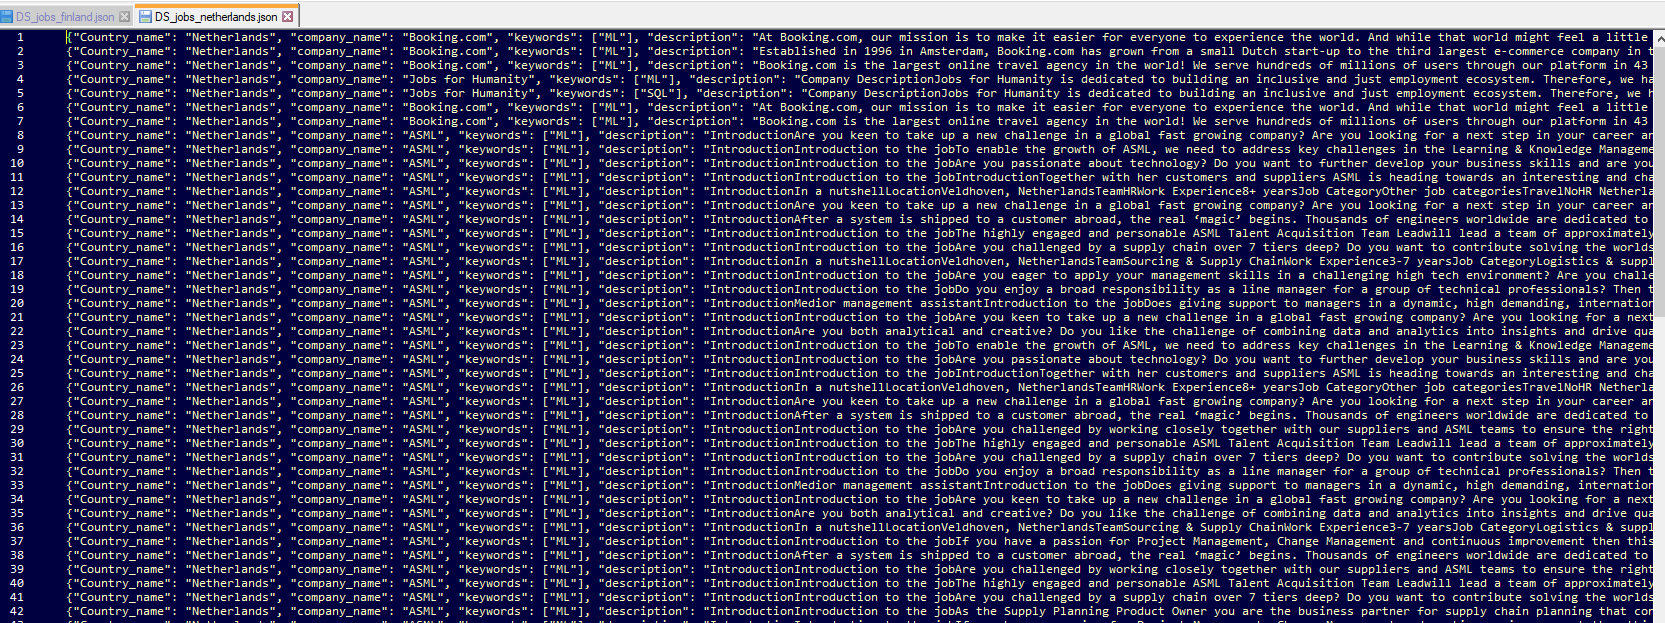

###  Scrapigng Machine learning and Data science job data for Denmark

In [ ]:
country_name= "Denmark"
geoId="104514075"
companies=['Maersk', 'Danske Bank', 'William Demant Holding', 'Nets', 'Ambu A/S', 'NNIT', 'Bang & Olufsen', 'DFDS', 'FLSmidth', 'Workday', 'Boston Consulting Group (BCG)', 'the LEGO Group', 'Antler', 'DTU - Technical University of Denmark', 'ATLANT 3D', 'Silo AI', 'ROCKWOOL Group', 'Corti', 'Accenture Nordics', 'TELUS International AI Data Solutions', 'Appen', 'IT-Universitetet i København', 'Nigel Frank International', 'Capgemini', 'TELUS International', 'Mindway AI']


print("Country: ", country_name)
print()

scraper = LinkedinScraper(country_name, geoId, companies )
scraper.scrape_jobs("DS_jobs_denmark.json")

Country:  Denmark

Company 1: Maersk
         Job 1: Maersk Supply Service A/S - Procurement Project Manager - Renewables downloaded!
         Job 2: Lead Infrastructure Architect downloaded!
         Job 3: Maersk Supply Service A/S - Procurement Project Manager - Renewables downloaded!
         Job 4: Lead Infrastructure Architect downloaded!
         Job 5: Analytics Engineer downloaded!
         Job 6: Maersk Supply Service A/S - Procurement Project Manager - Renewables downloaded!
         Job 7: Maersk Supply Service A/S - Procurement Project Manager - Renewables downloaded!
Company 2: Danske Bank
         Job 1: Skilled Business/Data Analyst in Impairment Data Analytics downloaded!
         Job 2: Senior Financial Crime Risk Officer for Asset Management downloaded!
         Job 3: Senior/Chief Analyst, Compliance Risk Assessments downloaded!
         Job 4: Senior Financial Crime Risk Officer for Asset Management downloaded!
         Job 5: Experienced ML Engineer to SuperAI dow

### A JSON file containing scraped data for Denmark might look like this:

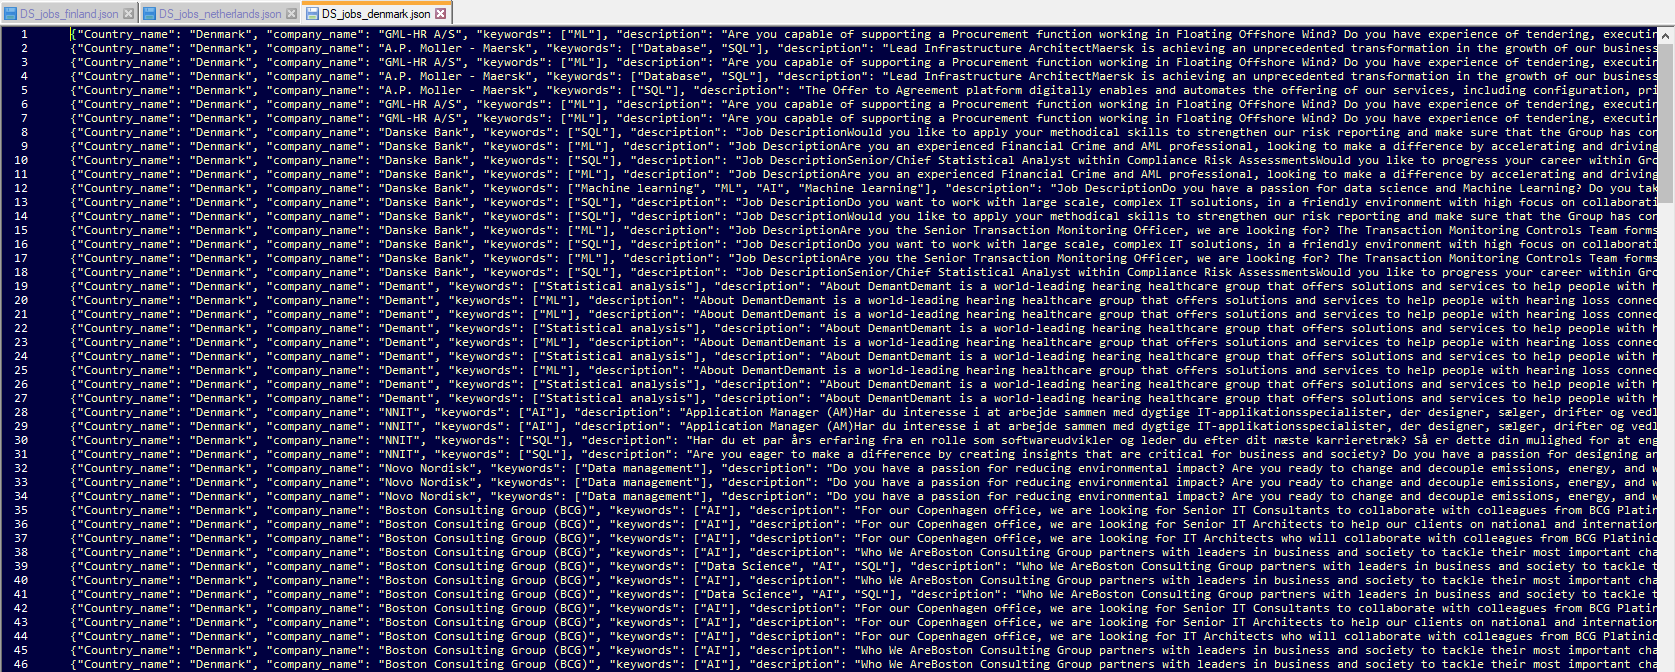

###  Scrapigng Machine learning and Data science job data for Sweden

In [ ]:
country_name= "Sweden"
geoId="105117694"
companies=['Klarna', 'Spotify', ' Scania', 'Ericsson', 'Volvo Group', 'Electrolux', 'H&M', 'Nordea', 'Handelsbanken', 'Swedbank', 'SAS', 'Atlas Copco', 'Com Hem', 'Net Insight', 'Tacton', 'Peltarion', 'Fidesmo', 'Sup46', 'Kognity', 'Karma', 'Mavenoid', 'Qualcomm', 'Northvolt', 'King', 'TDA Creative', 'Ark Kapital', 'Sinch', 'AFRY', 'TELUS International AI Data Solutions', 'Chalmers University of Technology', 'Linköping University', 'Arm', 'Frontiers', 'AstraZeneca', 'Amoria Bond', 'CGI', 'TELUS International']

print("Country: ", country_name)
print()

scraper = LinkedinScraper(country_name, geoId, companies )
scraper.scrape_jobs("DS_jobs_sweden.json")

Country:  Sweden

Company 1: Klarna
         Job 1: Product Manager - Platform Products downloaded!
         Job 2: Sanctions & AML Governance downloaded!
         Job 3: Director, Global Vendor Operations downloaded!
         Job 4: Senior Product Manager - Platform Products downloaded!
         Job 5: Portfolio Credit Risk Senior Analyst downloaded!
         Job 6: Senior Software Engineer - Functional Programming downloaded!
         Job 7: Sanctions & AML Governance downloaded!
         Job 8: Senior Product Manager - Platform Products downloaded!
         Job 9: Portfolio Credit Risk Senior Analyst downloaded!
         Job 10: Senior Software Engineer - Java downloaded!
         Job 11: Frontend Developer / Sweden downloaded!
Company 2: Spotify
         Job 1: Digital Operations Specialist downloaded!
         Job 2: Digital Operations Specialist downloaded!
         Job 3: Python Software Developer downloaded!
         Job 4: C++ Software Developer downloaded!
         Job 5: Ass

### A JSON file containing scraped data for Sweden might look like this:

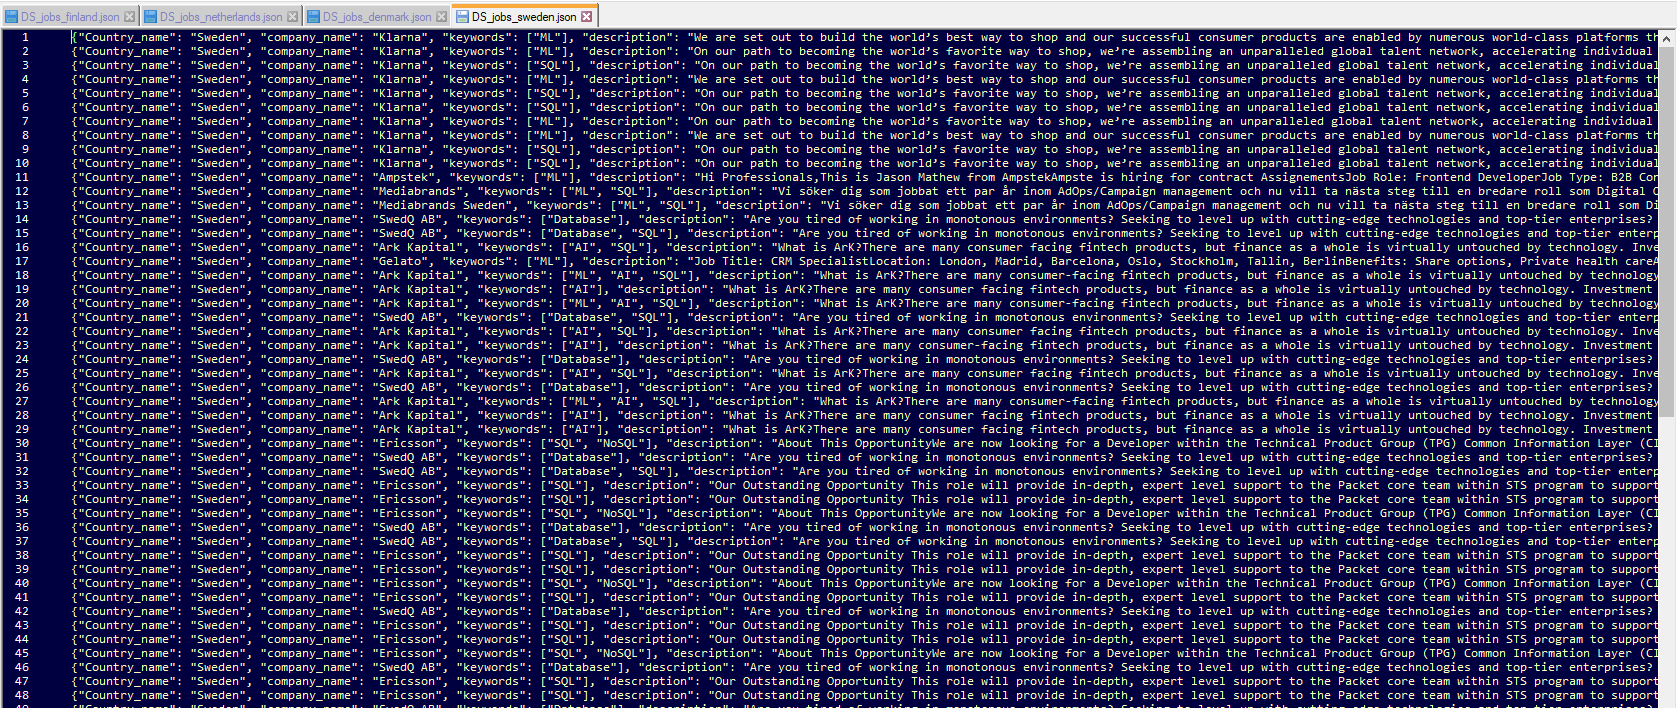

### Scrapigng Machine learning and Data science job data for Germany

In [ ]:
country_name= "Germany"
geoId="101282230"
companies= ['Parsionate', 'Sopra Steria', 'talentsconnect AG', 'E.ON', 'JAAI | JUST ADD AI GmbH', 'Datasumi','Kärcher', 'Oraylis GmbH','Allianz','ACONEXT', 'Bayer', 'BASF', 'BMW', 'Daimler','Continental', 'Fresenius Medical Care', 'Lufthansa', 'Merck', 'Munich Re', 'Volkswagen', 'Wirecard', 'Zalando', 'Delivery Hero', 'Scalable Capital', 'Flixbus Europe', 'Wefox', 'Solarisbank', 'Agoda', 'adesso SE', 'Amazon', 'BCG Platinion', 'Fraunhofer Karriere', 'Luxoft', 'sennder', 'Capgemini']
print("Country: ", country_name)
print()

scraper = LinkedinScraper(country_name, geoId, companies )
scraper.scrape_jobs("DS_jobs_germany.json")

Country:  Germany

Company 1: Parsionate
         Job 1: Data Engineer / Machine Learning (all genders) downloaded!
         Job 2: Senior Presales Consultant (all genders) downloaded!
         Job 3: Senior Presales Consultant (all genders) downloaded!
         Job 4: Data Engineer / Machine Learning (all genders) downloaded!
         Job 5: Senior Presales Consultant (all genders) downloaded!
         Job 6: Senior Presales Consultant (all genders) downloaded!
         Job 7: Data Engineer / Machine Learning (all genders) downloaded!
         Job 8: Senior Presales Consultant (all genders) downloaded!
         Job 9: Senior Presales Consultant (all genders) downloaded!
         Job 10: Data Engineer / Machine Learning (all genders) downloaded!
         Job 11: Senior Presales Consultant (all genders) downloaded!
         Job 12: Senior Presales Consultant (all genders) downloaded!
         Job 13: Data Engineer / Machine Learning (all genders) downloaded!
         Job 14: Senior Pres

### A JSON file containing scraped data for Germany might look like this:

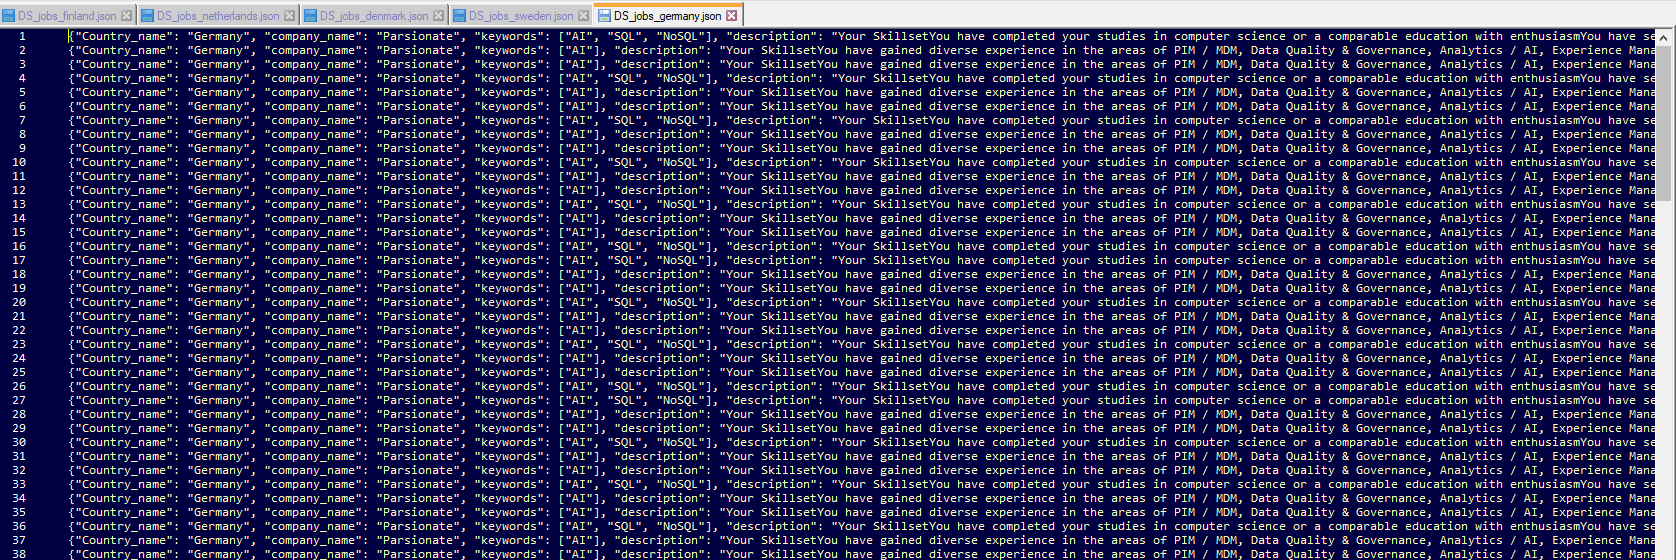